## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import numpy as np
from scipy.stats import norm

In [2]:
df = pd.read_csv('human_body_temperature.csv')
print "number of observations", len(df)
df.head()

number of observations 130


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## 1. Is the distribution of the temperature normal?

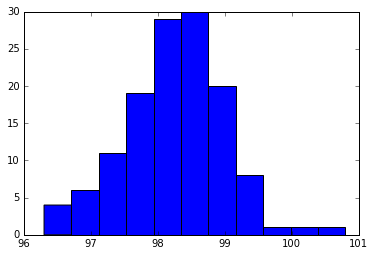

In [3]:
plt.hist(df['temperature'], bins = 11) #sample size 130, bins sqrt(130)
plt.show()

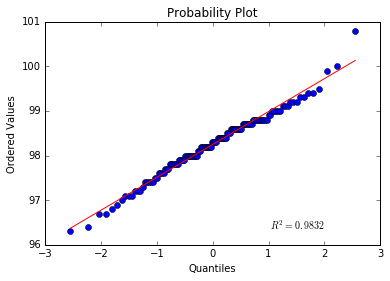

In [4]:
stats.probplot(df['temperature'], dist='norm', fit=True, plot=plt)
plt.show()

Seems to be: the histogram shows it looks normal, and the probability plot shows a high R² with the normal distribution.

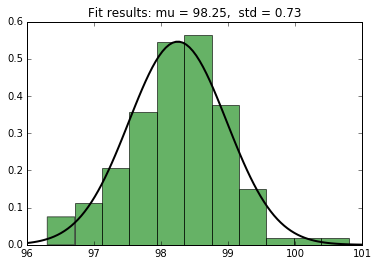

In [5]:
data = df['temperature']
#fit normal distribution to the data
mu, std = norm.fit(data)
#plot histogram
plt.hist(data, bins=11, normed=True, alpha=0.6, color='g')
#plot probability density function
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
#show
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()

## 2. Is the true population mean really 98.6 degrees F?

We assume we don't know what the population mean is. Text-books mention 98.2F and 98.6F. Is our sample compatible with the second?

Let's see which test to use: z-test or t-test? The sample size is greater than 30 but we don't know the population standard deviation, so we should use the t-test.

First, let's see what the sample mean is:

In [6]:
df['temperature'].mean()

98.24923076923076

The sample mean is 98.25F, closer to the revised value of 98.2F (historically it was thought to be 98.6F).

In [7]:
stats.ttest_1samp(df['temperature'], 98.6)

Ttest_1sampResult(statistic=-5.4548232923642983, pvalue=2.410632041558567e-07)

From our sample, we must say that the true population could very well be 98.6F, given that the p-value for the t-test of the difference is extremely small.

## 3. At what temperature should we consider someone's temperature to be "abnormal"?

Computed the margin of error and confidence interval.

In [8]:
temperature_mean = df['temperature'].mean()
temperature_sem = stats.sem(df['temperature'])
interval = (temperature_mean - temperature_sem, temperature_mean + temperature_sem)
print "We could define 'abnormal' temperatures as those that fall outside the range where 95% of observations are:",\
      interval

We could define 'abnormal' temperatures as those that fall outside the range where 95% of observations are: (98.184926352392878, 98.313535186068648)


## 4. Is there a significant difference between males and females in normal temperature?

Set up and solve for a two sample hypothesis testing.

In [9]:
males = df[df.gender == "M"]
females = df[df.gender == "F"]
stats.ttest_ind(males['temperature'], females['temperature'], equal_var=False)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023938264182934228)

The p-value is less than 5% so we should reject the hypothesis that the means are the same.